In [10]:
import logging
import sys
from pathlib import Path


logging.basicConfig(
    level=logging.DEBUG,
    format="%(levelname)s: %(message)s",
    force=True,
)

# Add the src directory to the Python path
sys.path.append(str(Path.cwd().parent.parent))

In [11]:
from pprint import pprint

from pymoo.optimize import minimize

from src.constants import SEED
from src.nas.nas_params import NasParams
from src.nas.plot import hist_accuracies


In [12]:
from src.nas.cnn_chromosome import CNNChromosome, RawCNNChromosome

pprint(RawCNNChromosome.get_size())
pprint(RawCNNChromosome.get_bounds())

26
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0]),
 array([7, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 7, 3, 7, 3, 7, 2, 3, 3, 0,
       1, 1, 6, 3]))


In [18]:
from src.datasets.mnist_dataset import MiniMNISTDataset
from src.nas.cnn_nas_problem import CnnNasProblem


CnnDatasetClass = MiniMNISTDataset
cnn_nas_params = NasParams(
    epochs=3,
    patience=5,
    amount_of_evaluations=1,
    population_size=20,
    population_offspring_count=8,
    algorithm_generations=1,
    population_store_file=CnnDatasetClass.__name__ + "_population.csv",
)
cnn_problem = CnnNasProblem(cnn_nas_params, CnnDatasetClass)

cnn_problem.get_min_complexity(), cnn_problem.get_max_complexity()

(229672.0, 1454520.0)

In [14]:
from src.models.cnn import CNN, CNNEvaluator

x = [0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 7, 0, 0, 0, 0, 0, 0, 5, 3]
cnn_ch = RawCNNChromosome(x).parse()
pprint(cnn_ch)

CNNChromosome(in_bitwidth=1,
              conv_layers=3,
              conv_channels1=32,
              conv_stride1=2,
              conv_pooling_size1=2,
              conv_channels2=24,
              conv_stride2=1,
              conv_pooling_size2=1,
              conv_channels3=32,
              conv_stride3=1,
              conv_pooling_size3=1,
              fc_layers=3,
              fc_height1=64,
              fc_bitwidth1=3,
              fc_height2=64,
              fc_bitwidth2=4,
              fc_height3=32,
              fc_bitwidth3=8,
              dropout=0.0,
              activation=<ActivationModule.RELU: 'relu'>,
              reste_o=1.5,
              reste_threshold=1.5,
              quatization_mode=<QMode.DET: 'det'>,
              binarization_mode=<QMode.DET: 'det'>,
              learning_rate=0.005,
              weight_decay=0.001)


In [15]:
cnn_params = cnn_problem.get_nn_params(cnn_ch)
CNN(cnn_params)

CNN(
  (in_quantize_layer): Module_Quantize()
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2dWrapper(1, 32, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2dWrapper(32, 24, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Conv2dWrapper(24, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (fc_layers): Sequential(
    (0): QuantizedWeightLinear(in_features=128, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Quantiz

In [16]:
from src.datasets.mnist_dataset import fetch_mnist_dataset


train_dataset, test_dataset = fetch_mnist_dataset()
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [8]:
import numpy as np


X, y = MiniMNISTDataset.get_xy()
y_1d = np.argmax(y)
y_1d, y

(tensor(4), tensor([5, 0, 4,  ..., 3, 9, 6], dtype=torch.int32))

In [19]:
from src.models.cnn import KFoldCNNEvaluator


KFoldCNNEvaluator(cnn_params).evaluate_model()

/home/nur/Projects/vut-ip1-nn-quantization/src/datasets/dataset.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32)
/home/nur/Projects/vut-ip1-nn-quantization/src/datasets/dataset.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.int64)
DEBUG: Train Epoch:  1 [ 128/3200] Loss: 2.3783
DEBUG: Train Epoch:  1 [ 768/3200] Loss: 1.8347
DEBUG: Train Epoch:  1 [1408/3200] Loss: 1.5424
DEBUG: Train Epoch:  1 [2048/3200] Loss: 1.3588
DEBUG: Train Epoch:  1 [2688/3200] Loss: 1.1780
DEBUG: Test set: Average loss: 1.3726, Accuracy: 635/800 (79.38%)
DEBUG: Train Epoch:  2 [ 128/3200] Loss: 0.9088
DEBUG: Train Epoch

{'max': 94.625,
 'mean': np.float64(93.625),
 'std': np.float64(0.9842509842514764),
 'accuracies': [94.25, 94.625, 94.125, 91.875, 93.25]}

In [17]:
algorithm = cnn_nas_params.get_algorithm()
termination = cnn_nas_params.get_termination()

res = minimize(cnn_problem, algorithm, verbose=True, seed=SEED, termination=termination)

if cnn_nas_params.population_store_file is not None:
    cnn_nas_params.store_population(res, cnn_nas_params.population_store_file)

print(f"Solutions: {res.X}")
print(f"Objectives: {res.F}")

INFO: Population file loaded successfully
DEBUG: Evaluating CNNParams(conv=ConvParams(in_channels=1, in_dimensions=28, in_bitwidth=1, out_height=10, layers=[ConvLayerParams(channels=32, kernel_size=3, stride=2, padding=0, dilation=1, groups=1, bias=True, pooling_kernel_size=2), ConvLayerParams(channels=24, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True, pooling_kernel_size=1), ConvLayerParams(channels=32, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True, pooling_kernel_size=1)], activation=<ActivationModule.RELU: 'relu'>, reste_threshold=1.5, reste_o=1.5, qmode=<QMode.DET: 'det'>, dropout_rate=0.0), fc=FCParams(layers=[FCLayerParams(height=784, weight_qmode=<WeightQuantMode.NBITS: 'nbits'>, weight_bitwidth=1), FCLayerParams(height=64, weight_qmode=<WeightQuantMode.NBITS: 'nbits'>, weight_bitwidth=3), FCLayerParams(height=64, weight_qmode=<WeightQuantMode.NBITS: 'nbits'>, weight_bitwidth=4), FCLayerParams(height=32, weight_qmode=<WeightQuantMode.N

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        1 |      1 |             - |             -
Solutions: [[0 2 2 1 1 1 0 0 2 0 0 2 2 2 2 3 1 7 0 0 0 0 0 0 5 3]]
Objectives: [[-0.94625  0.     ]]


In [20]:
df = cnn_problem.result_as_df(res)
df

,Accuracy,Complexity,conv_in_channels,conv_in_dimensions,conv_in_bitwidth,conv_out_height,conv_layers,conv_activation,conv_reste_threshold,conv_reste_o,...,fc_layers,fc_activation,fc_qmode,fc_dropout_rate,train_DatasetCls,train_epochs,train_learning_rate,train_weight_decay,train_early_stop_patience,Chromosome
0,94.625,229672.0,1,28,1,10,"[{'channels': 32, 'kernel_size': 3, 'stride': ...",ActivationModule.RELU,1.5,1.5,...,"[{'height': 784, 'weight_qmode': WeightQuantMo...","{'activation': ActivationModule.RELU, 'binary_...",QMode.DET,0.0,<class 'src.datasets.mnist_dataset.MiniMNISTDa...,3,0.005,0.001,5,"[0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, ..."


In [21]:
pprint(cnn_problem.get_nn_params(RawCNNChromosome(res.X[0]).parse()))

CNNParams(conv=ConvParams(in_channels=1,
                          in_dimensions=28,
                          in_bitwidth=1,
                          out_height=10,
                          layers=[ConvLayerParams(channels=32,
                                                  kernel_size=3,
                                                  stride=2,
                                                  padding=0,
                                                  dilation=1,
                                                  groups=1,
                                                  bias=True,
                                                  pooling_kernel_size=2),
                                  ConvLayerParams(channels=24,
                                                  kernel_size=3,
                                                  stride=1,
                                                  padding=0,
                                                  dilation=1,
                

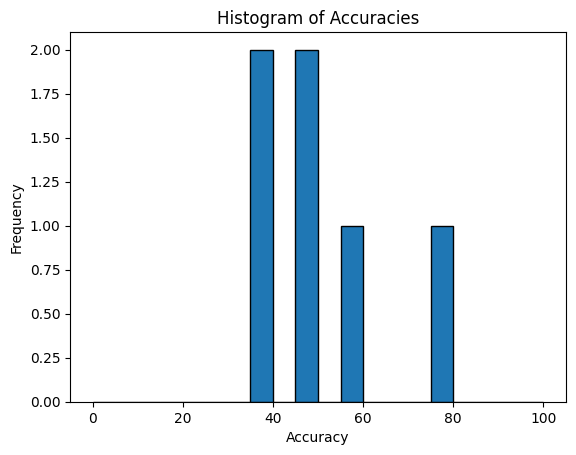

In [12]:
fig = hist_accuracies(df["Accuracy"])

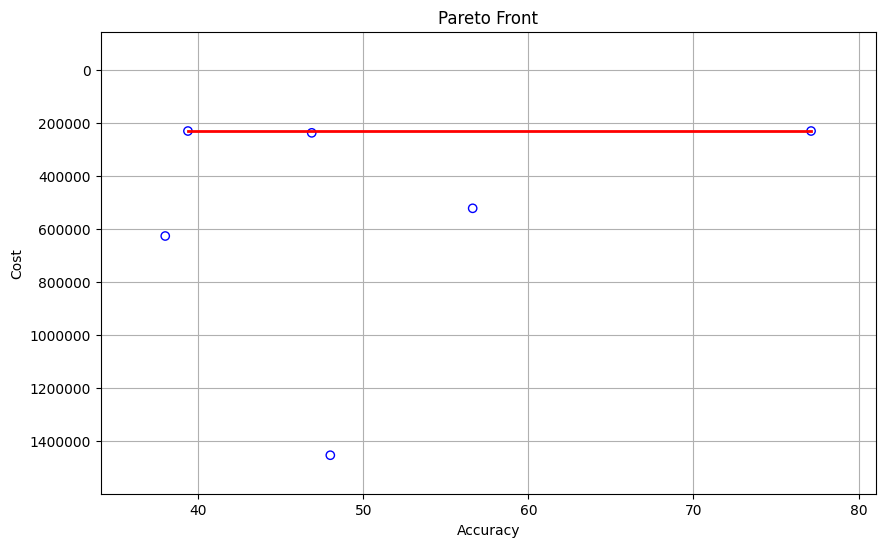

In [13]:
from src.nas import plot

fig = plot.plot_pareto_front(df["Accuracy"], df["Complexity"])

In [26]:
pprint(RawCNNChromosome(df.iloc[2]["Chromosome"]).parse())

df.iloc[2]["Accuracy"]

CNNChromosome(in_bitwidth=1,
              conv_layers=3,
              conv_channels1=32,
              conv_stride1=2,
              conv_pooling_size1=2,
              conv_channels2=24,
              conv_stride2=1,
              conv_pooling_size2=1,
              conv_channels3=32,
              conv_stride3=1,
              conv_pooling_size3=1,
              fc_layers=3,
              fc_height1=64,
              fc_bitwidth1=3,
              fc_height2=64,
              fc_bitwidth2=4,
              fc_height3=32,
              fc_bitwidth3=8,
              dropout=0.0,
              activation=<ActivationModule.RELU: 'relu'>,
              reste_o=1.5,
              reste_threshold=1.5,
              quatization_mode=<QMode.DET: 'det'>,
              binarization_mode=<QMode.DET: 'det'>,
              learning_rate=0.005,
              weight_decay=0.001)


np.float64(81.375)

In [27]:
pprint(RawCNNChromosome(df.iloc[4]["Chromosome"]).parse())

df.iloc[4]["Accuracy"]

CNNChromosome(in_bitwidth=5,
              conv_layers=2,
              conv_channels1=32,
              conv_stride1=2,
              conv_pooling_size1=1,
              conv_channels2=24,
              conv_stride2=2,
              conv_pooling_size2=1,
              conv_channels3=32,
              conv_stride3=2,
              conv_pooling_size3=1,
              fc_layers=1,
              fc_height1=32,
              fc_bitwidth1=8,
              fc_height2=64,
              fc_bitwidth2=7,
              fc_height3=32,
              fc_bitwidth3=5,
              dropout=0.0,
              activation=<ActivationModule.BINARIZE_RESTE: 'binary_ReSTE'>,
              reste_o=3.0,
              reste_threshold=1.5,
              quatization_mode=<QMode.DET: 'det'>,
              binarization_mode=<QMode.DET: 'det'>,
              learning_rate=0.002,
              weight_decay=0.01)


np.float64(43.125)